## Experiment 1 (WAP to implement BackPropagation ANN)

In [1]:
import numpy as np
# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input data (6 samples, each with 3 features)
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1],
              [0, 1, 0],
              [1, 0, 0]])

# Output data (6 samples, each with 1 target)
y = np.array([[0],
              [1],
              [1],
              [0],
              [1],
              [0]])

# Seed the random number generator for reproducibility
np.random.seed(1)

# Initialize weights randomly with mean 0 
weights = 2 * np.random.random((3, 1)) - 1

# Learning rate
learning_rate = 0.1

# Number of iterations
iterations = 10000

# Training process
for iteration in range(iterations):
    # Forward propagation
    input_layer = X
    outputs = sigmoid(np.dot(input_layer, weights))
    
    # Calculate the error
    error = y - outputs
    
    # Backpropagation
    adjustments = error * sigmoid_derivative(outputs)
    weights += np.dot(input_layer.T, adjustments) * learning_rate

# Final weights after training 
print("Weights after training:")
print(weights)

# Test the network with a new input 
test_input = np.array([1, 0, 0])
output = sigmoid(np.dot(test_input, weights))
print("Output for test input [1,0,0]:")
print(output)

Weights after training:
[[-6.13247298]
 [ 5.93154685]
 [-3.04009409]]
Output for test input [1,0,0]:
[0.0021665]


## EXperiment 2 - WAP to implement Naive Bayes Classifier on a given dataset

In [3]:
# Deep Learning Experiment 2                                                                                                                                                                                                                            import pandas as pd
import pandas as pd
# Define the Dataset
data = {
    'Age': ['young','young','middle-aged','old','young','middle-aged','old','old','young','middle-aged'],
    'Income':['low','medium','medium','high','high','low','medium','low','high','medium'],
    'Purchase':['not-buy','buy','buy','buy','buy','not-buy','buy','not-buy','not-buy','buy']
}

# Create a dataframe
df = pd.DataFrame(data)

# Calculate prior probabilities
P_buy = df['Purchase'].value_counts()['buy'] / len(df)
P_notbuy = df['Purchase'].value_counts()['not-buy'] / len(df)

# Calculate likelihoods
P_middleaged_buy = len(df[(df['Age'] == 'middle-aged') & (df['Purchase'] == 'buy')]) / len(df[df['Purchase'] == 'buy'])
P_middleaged_notbuy = len(df[(df['Age'] == 'middle-aged') & (df['Purchase'] == 'not-buy')]) / len(df[df['Purchase'] == 'not-buy'])

P_high_buy = len(df[(df['Income'] == 'high') & (df['Purchase'] == 'buy')]) / len(df[df['Purchase'] == 'buy'])
P_high_notbuy = len(df[(df['Income'] == 'high') & (df['Purchase'] == 'not-buy')]) / len(df[df['Purchase'] == 'not-buy'])

# Calculate posterior probabilities (unnormalized)
posterior_buy = P_middleaged_buy * P_high_buy * P_buy
posterior_notbuy = P_middleaged_notbuy * P_high_notbuy * P_notbuy

# Normalize posterior probabilities
total_posterior = posterior_buy + posterior_notbuy
posterior_buy_normalized = posterior_buy / total_posterior
posterior_notbuy_normalized = posterior_notbuy / total_posterior

# Print Results
print(f'P(Purchase = buy| Age = middle-aged, Income = high): {posterior_buy_normalized}')
print(f'P(Purchase = not-buy| Age = middle-aged, Income = high): {posterior_notbuy_normalized}')

# Make Prediction
if posterior_buy_normalized > posterior_notbuy_normalized:
    print('Prediction: Buy, Purchase')
else:
    print('Prediction: No, Do not Purchase')

P(Purchase = buy| Age = middle-aged, Income = high): 0.7272727272727272
P(Purchase = not-buy| Age = middle-aged, Income = high): 0.2727272727272727
Prediction: Buy, Purchase


## Experiment 3 - WAP K nearest neighbor algorithm to classify the iris dataset print both correct and wrong predictions

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print both correct and wrong predictions
correct_predictions = 0
wrong_predictions = 0

for i in range(len(y_test)):
    true_label = target_names[y_test[i]]
    predicted_label = target_names[y_pred[i]]

    if y_test[i] == y_pred[i]:
        print(f"✅ Correct: True Label = {true_label}, Predicted Label = {predicted_label}")
        correct_predictions += 1
    else:
        print(f"❌ Wrong: True Label = {true_label}, Predicted Label = {predicted_label}")
        wrong_predictions += 1

# Print the number of correct and wrong predictions
print(f"\nSummary:")
print(f"Correct Predictions: {correct_predictions}")
print(f"Wrong Predictions: {wrong_predictions}")

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


✅ Correct: True Label = versicolor, Predicted Label = versicolor
✅ Correct: True Label = setosa, Predicted Label = setosa
✅ Correct: True Label = virginica, Predicted Label = virginica
✅ Correct: True Label = versicolor, Predicted Label = versicolor
✅ Correct: True Label = versicolor, Predicted Label = versicolor
✅ Correct: True Label = setosa, Predicted Label = setosa
✅ Correct: True Label = versicolor, Predicted Label = versicolor
✅ Correct: True Label = virginica, Predicted Label = virginica
✅ Correct: True Label = versicolor, Predicted Label = versicolor
✅ Correct: True Label = versicolor, Predicted Label = versicolor
✅ Correct: True Label = virginica, Predicted Label = virginica
✅ Correct: True Label = setosa, Predicted Label = setosa
✅ Correct: True Label = setosa, Predicted Label = setosa
✅ Correct: True Label = setosa, Predicted Label = setosa
✅ Correct: True Label = setosa, Predicted Label = setosa
✅ Correct: True Label = versicolor, Predicted Label = versicolor
✅ Correct: Tru

## Experiment 4 - WAP to implement and demonstrate Locally Weighted Regression Algorithm

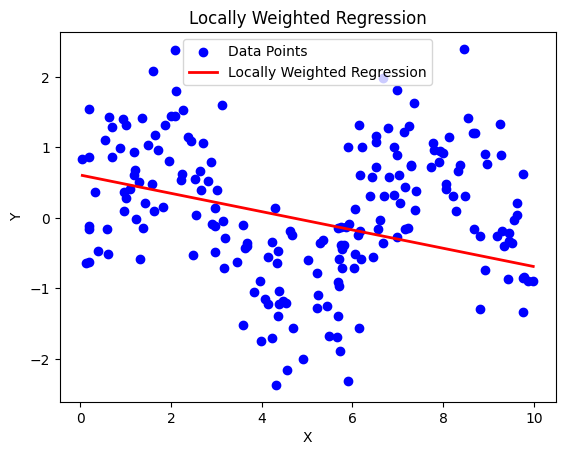

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def local_regression(x0, X, Y, tau):
    """Perfrom local regression at a point x0."""
    #Calculate weights using Gaussian kernel
    weights = np.exp(- (X-x0)*2 / (2*tau*2)).ravel()
    # Fit a weighted Linear Model
    model = LinearRegression()
    model.fit(X,Y, sample_weight = weights)

    #Predict the value at x0
    return model.predict(np.array([[x0]]))[0]

# Sample data
np.random.seed(0)
X= np.sort(np.random.rand(200)*10).reshape(-1,1)
Y= np.sin(X).ravel() + np.random.normal(0,0.7,200)

#Fit the local regression model for each point in X
tau = 1.0 #Bandwidth parameter
Y_pred = np.array([local_regression(x0,X,Y,tau) for x0 in X.ravel()])

#Plot the results
plt.scatter(X,Y,label = "Data Points", color = "blue")
plt.plot(np.sort(X.ravel()), Y_pred[np.argsort(X.ravel())],label="Locally Weighted Regression", color="red",linewidth=2)
plt.title("Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Experiment 6 - WAP to implement K means Clustering in Python

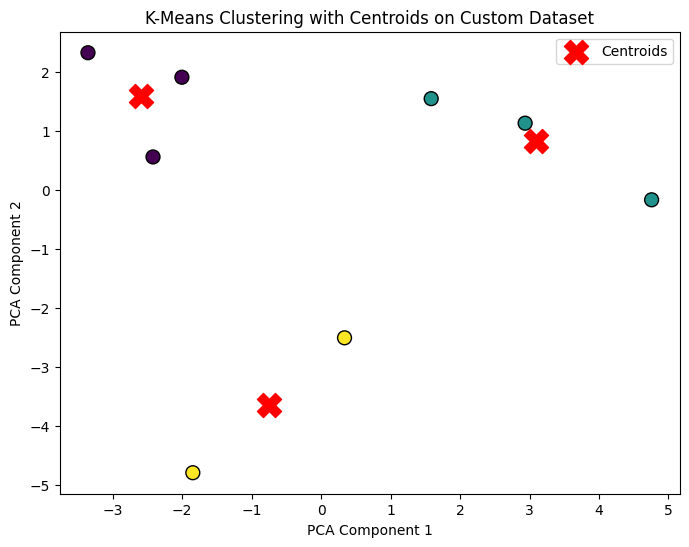

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Your custom dataset
data = np.array([
    [2, 10],
    [2, 5],
    [8, 4],
    [5, 8],
    [7, 5],
    [6, 4],
    [1, 2],
    [4, 9]
])

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Apply PCA to reduce to 2 components (for visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
centroids_pca = pca.transform(centroids)  # Transform centroids to the PCA space

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with Centroids on Custom Dataset')
plt.legend()
plt.show()


## Experiemnt 7 - WAP to implement DecisionTreeClassifier and Visualize its decision making process

Prediction for [Income = 55k, Credit Score = 250]: Buy


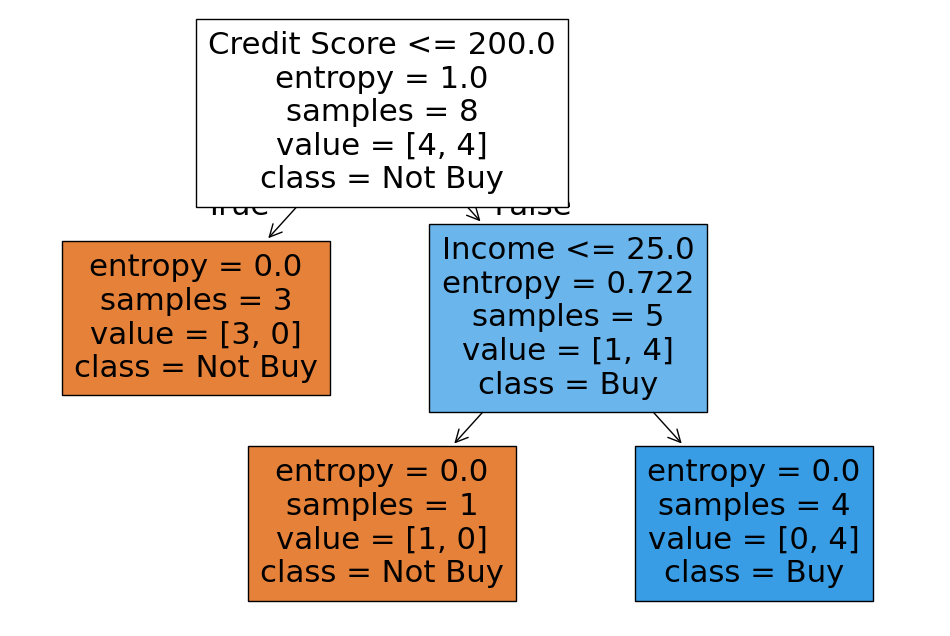

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

X= np.array([
    [50,500], [50,300], [30,300], [20,100], [20,300], [30,500], [50,100],[30,100]
])

# Target: NO(not buying)=0, Yes(buying) = 1
y = np.array([1,1,1,0,0,1,0,0]) 

#create the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 2, random_state = 42)

#Train the classifier with the data
clf.fit(X,y)

# Make a prediction 
new_data = np.array([[55,250]])

prediction = clf.predict(new_data)
print(f"Prediction for [Income = 55k, Credit Score = 250]: {'Buy' if prediction[0] == 1 else 'Not Buy'}")

#visualize the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names = ["Income", "Credit Score"], class_names = ["Not Buy", "Buy"], filled= True)
plt.show()


## Experiment 8 - WAP to implement Principal Component Analysis (PCA) on any dataset

Data centered around mean:
 [[-4.         -6.88888889]
 [-3.         -4.88888889]
 [-2.         -2.88888889]
 [-1.         -1.88888889]
 [ 0.          0.11111111]
 [ 1.          1.11111111]
 [ 2.          3.11111111]
 [ 3.          5.11111111]
 [ 4.          7.11111111]]
Covariance Matrix:
 [[ 7.5        12.625     ]
 [12.625      21.36111111]]
Eigenvalues:
 [2.83603997e-02 2.88327507e+01]
Eigenvectors:
 [[-0.86058562 -0.50930579]
 [ 0.50930579 -0.86058562]]
Sorted Eigenvalues:
 [2.88327507e+01 2.83603997e-02]
Sorted Eigenvectors:
 [[-0.50930579 -0.86058562]
 [-0.86058562  0.50930579]]
Projected Data onto Principal Component:
 [ 7.96570189  5.73522485  3.50474782  2.13485641 -0.09562062 -1.46551204
 -3.69598907 -5.9264661  -8.15694314]


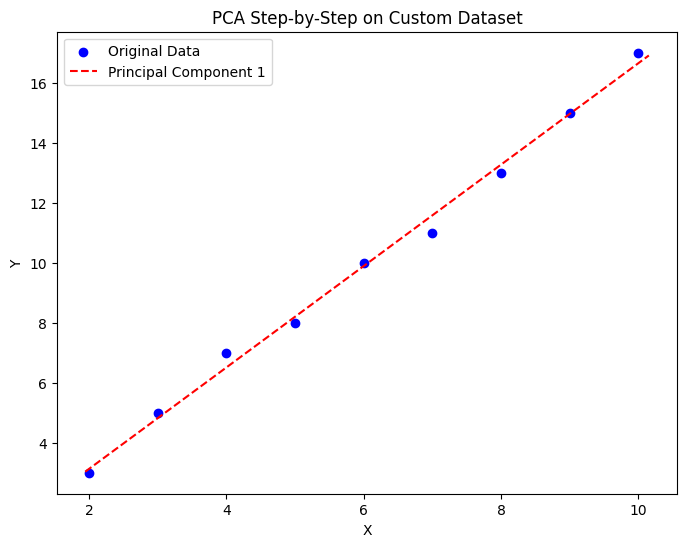

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Custom dataset
data = np.array([
    [2, 3],
    [3, 5],
    [4, 7],
    [5, 8],
    [6, 10],
    [7, 11],
    [8, 13],
    [9, 15],
    [10, 17]
])

# Centering the data by subtracting the mean
mean = np.mean(data, axis=0)
data_centered = data - mean
print("Data centered around mean:\n", data_centered)

# Covariance matrix
cov_matrix = np.cov(data_centered.T)
print("Covariance Matrix:\n", cov_matrix)
# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)

# Project data onto the first principal component (1D reduction)
pca_data = data_centered.dot(sorted_eigenvectors[:, 0])
print("Projected Data onto Principal Component:\n", pca_data)

# Plot original data and projection
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='b', label="Original Data")
plt.xlabel('X')
plt.ylabel('Y')

# Calculate the line representing the first principal component
pc1_line = pca_data[:, np.newaxis] * sorted_eigenvectors[:, 0] + mean
plt.plot(pc1_line[:, 0], pc1_line[:, 1], color='r', linestyle='--', label="Principal Component 1")

plt.legend()
plt.title('PCA Step-by-Step on Custom Dataset')
plt.show()



## Experiment 9 - WAP to implement Confusion Matrix and ROC Curve

Confusion Matrix:
 [[118  17]
 [ 29 136]]


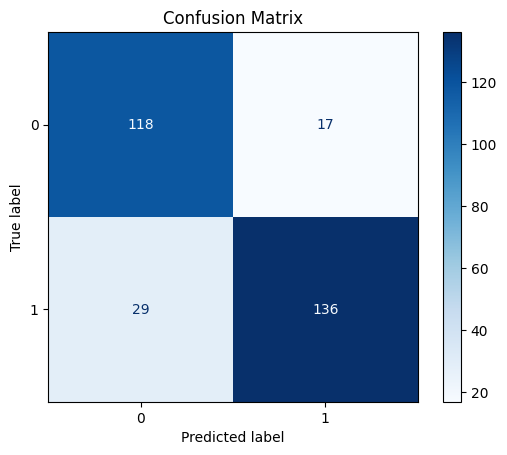

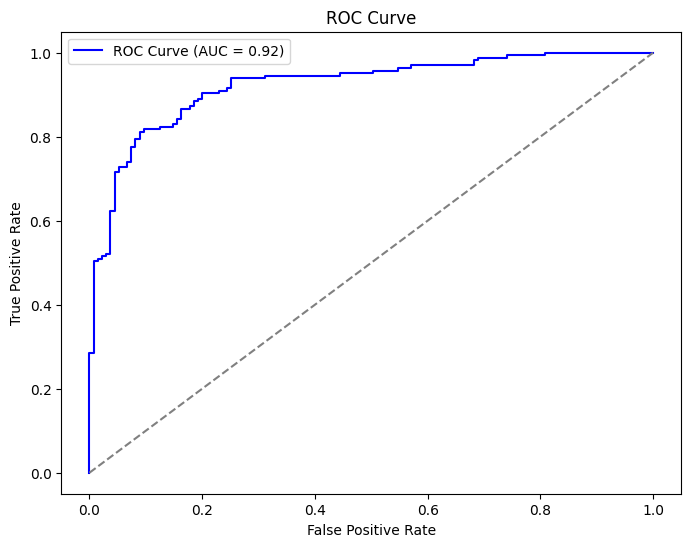

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# -------------------
# Part 1: Confusion Matrix
# -------------------

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# -------------------
# Part 2: ROC Curve
# -------------------

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Experiment 10 - WAP to implement SVM on any dataset and analyze the accuracy with logistic regression

In [14]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a custom dataset
# Features: [feature1, feature2]
# Labels: 0 or 1
X = np.array([
    [2, 3], [1, 2], [2, 1], [3, 4],
    [5, 6], [6, 7], [5, 5], [6, 6],
    [8, 8], [9, 9], [8, 7], [7, 8],
    [3, 5], [4, 4], [3, 3], [4, 3]
])

# Labels
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions with the SVM model
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)
print("SVM Classification Report:\n", class_report_svm)

# Create and train the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=200, random_state=42)
logreg_classifier.fit(X_train, y_train)

# Make predictions with the Logistic Regression model
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

print("\nLogistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logreg)
print("Logistic Regression Classification Report:\n", class_report_logreg)


# Compare and print the better model based on accuracy
if accuracy_svm > accuracy_logreg:
    print("\nSVM has higher accuracy than Logistic Regression.")
elif accuracy_logreg > accuracy_svm:
    print("\nLogistic Regression has higher accuracy than SVM.")
else:
    print("\nBoth models have the same accuracy.")


SVM Accuracy: 1.0
SVM Confusion Matrix:
 [[4 0]
 [0 1]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Logistic Regression Accuracy: 1.0
Logistic Regression Confusion Matrix:
 [[4 0]
 [0 1]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Both models have the same accuracy.
